In [1]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('0422.csv')
data

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,level_0,index,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,Season,Matchweek,Home_code,Away_code,Venue_code
0,0,0,0,E0,14/08/04,Aston Villa,Southampton,2,0,H,...,0.000000,0.000000,0.000000,0.000000,0.000000,2004,1,1,31,1
1,1,1,1,E0,14/08/04,Blackburn,West Brom,1,1,D,...,0.000000,0.000000,0.000000,0.000000,0.000000,2004,1,3,37,3
2,2,2,2,E0,14/08/04,Bolton,Charlton,4,1,H,...,0.000000,0.000000,0.000000,0.000000,0.000000,2004,1,5,11,5
3,3,3,3,E0,14/08/04,Man City,Fulham,1,1,D,...,0.000000,0.000000,0.000000,0.000000,0.000000,2004,1,22,16,22
4,4,4,4,E0,14/08/04,Middlesbrough,Newcastle,2,2,D,...,0.000000,0.000000,0.000000,0.000000,0.000000,2004,1,24,25,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,6835,375,E0,22/05/2022,Crystal Palace,Man United,1,0,H,...,1.540541,1.243243,1.513514,1.145119,2.024890,2021,38,13,23,13
6836,6836,6836,376,E0,22/05/2022,Leicester,Southampton,4,1,H,...,1.135135,1.567568,1.702703,1.458746,1.218225,2021,38,20,31,20
6837,6837,6837,377,E0,22/05/2022,Liverpool,Wolves,3,1,H,...,1.000000,0.675676,1.081081,1.925329,1.188679,2021,38,21,40,21
6838,6838,6838,378,E0,22/05/2022,Man City,Aston Villa,3,2,H,...,1.351351,0.648649,1.378378,1.919473,1.195079,2021,38,22,1,22


In [3]:
data1 = data[data['Matchweek'] != 1]

In [4]:
data2 = data1[data1['Matchweek'] != 2]

In [5]:
data = data2[data2['Matchweek'] != 3]

In [8]:
data['pastHP-AP'] = data['pastHP']-data['pastAP']
data['pastHG-AG'] = data['pastHG']-data['pastAG']
data['pastAGC-HGC'] = data['pastAGC']-data['pastHGC']
data['pastHS-AS'] = data['pastHS']-data['pastAS']
data['pastASC-HSC'] = data['pastASC']-data['pastHSC']
data['pastHST-AST'] = data['pastHST']-data['pastAST']
data['pastASTC-HSTC'] = data['pastASTC']-data['pastHSTC']
data['GoalDiff'] = data['HomeGoal']-data['AwayGoal']
data['ConcededDiff'] = data['AwayConceded']-data['HomeConceded']
data['PointDiff'] = data['HomeFullPoint'] - data['AwayFullPoint']
data['EloDiff'] = data['HomeAvgPoint']-data['AwayAvgPoint']

C:\Users\Admin\AppData\Local\Temp/ipykernel_9856/3122671519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pastHP-AP'] = data['pastHP']-data['pastAP']
C:\Users\Admin\AppData\Local\Temp/ipykernel_9856/3122671519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pastHG-AG'] = data['pastHG']-data['pastAG']
C:\Users\Admin\AppData\Local\Temp/ipykernel_9856/3122671519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [35]:
def runKFold(i, k, l):
    X = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    train_data_mean = np.mean(X, axis=0)
    train_data_std = np.std(X, axis=0)
    eps=1e-9
    x = (X - train_data_mean) / (train_data_std + eps)
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    knn_model = model = KNeighborsClassifier(n_neighbors=i, weights = k, metric = l)
    kfold = StratifiedKFold(n_splits=17)
    X = x[0:5950]
    Y = y[0:5950]
    results = cross_val_score(knn_model, X, Y, cv=kfold)
    acc = results.mean()
    return acc

In [12]:
runKFold(250, 'distance', 'manhattan')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5292436974789917

In [31]:
def runKNN(i, k, l, m, n, o):
    X = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    eps=1e-9
    train_data_mean = np.mean(X, axis=0)
    train_data_std = np.std(X, axis=0)
    x = (X - train_data_mean) / (train_data_std + eps)
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    t = (m-2004)*350
    q = (n-4)*10
    r = o*10
    x_train = x[0:t]
    y_train = y[0:t]
    x_test = x[t+q:t+r]
    y_test = y[t+q:t+r]
    model = KNeighborsClassifier(n_neighbors=i, weights = k, metric = l)
    clf_KNN = model.fit(x_train, y_train)
    y_pred_KNN = clf_KNN.predict(x_test)
    acc = accuracy_score(y_pred_KNN, y_test)
    return acc

In [34]:
runKNN(400, 'distance', 'manhattan', 2021, 4, 38)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5371428571428571

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

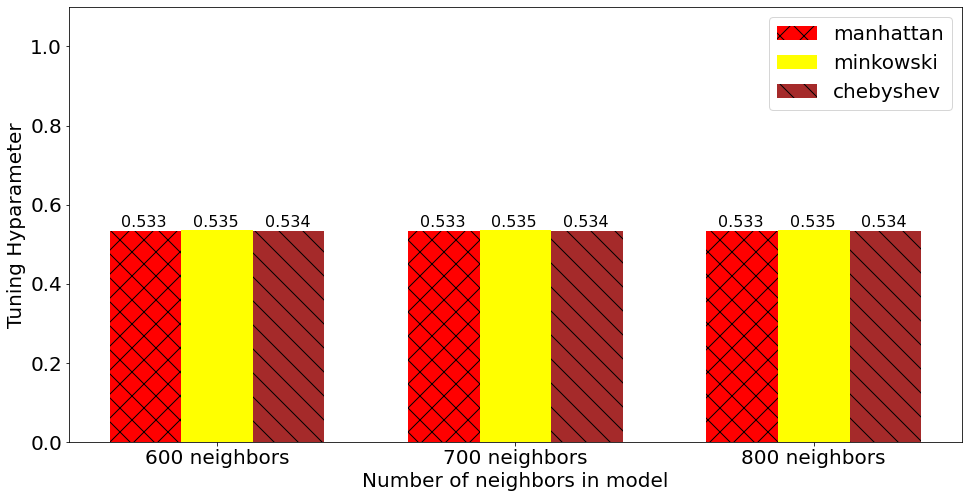

In [36]:
val_50_1_1 = runKFold(300, 'distance', 'manhattan')
val_50_1_2 = runKFold(400, 'distance', 'minkowski')
val_50_1_3 = runKFold(500, 'distance', 'chebyshev')

val_50_2_1 = runKFold(300, 'distance', 'manhattan')
val_50_2_2 = runKFold(400, 'distance', 'minkowski')
val_50_2_3 = runKFold(500, 'distance', 'chebyshev')

val_50_3_1 = runKFold(300, 'distance', 'manhattan')
val_50_3_2 = runKFold(400, 'distance', 'minkowski')
val_50_3_3 = runKFold(500, 'distance', 'chebyshev')


objects = ('600 neighbors', '700 neighbors', '800 neighbors')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn150 = [val_50_1_1, val_50_2_1, val_50_3_1]
knn200 = [val_50_1_2, val_50_2_2, val_50_3_2]
knn250 = [val_50_1_3, val_50_2_3, val_50_3_3]

for index, value in enumerate(knn150):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn250):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn150, 0.24, label = 'manhattan', color = 'red')
plt.bar(y_pos, knn200, 0.24, label = 'minkowski', color = 'yellow')
bars_linear = plt.bar(y_pos + 0.24, knn250, 0.24, label = 'chebyshev', color = 'brown')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.1])
plt.ylabel("Tuning Hyparameter")
plt.xlabel("Number of neighbors in model")
patterns = ("x", "x", "x")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('KNN2.png')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

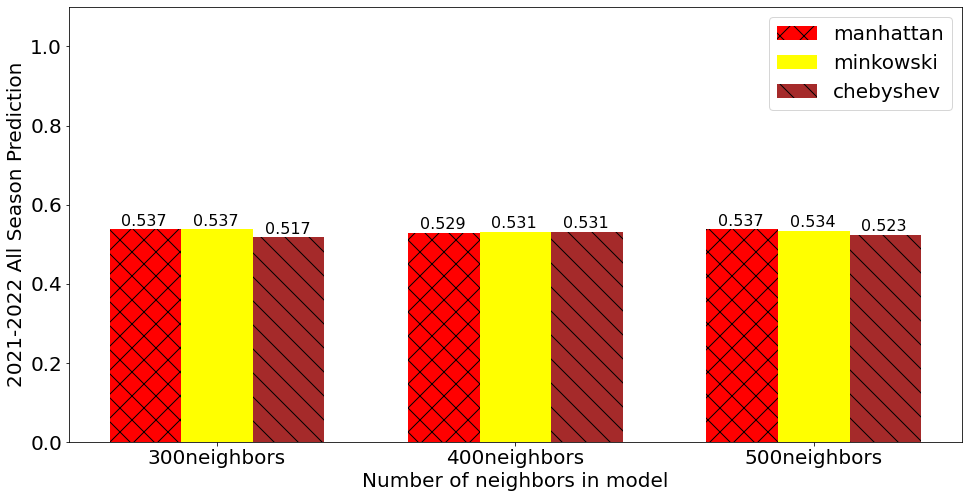

In [28]:
a=300
b=400
c=500
accuary_50_1_1 = runKNN(a, 'distance', 'manhattan', 2021, 4, 38)
accuary_50_1_2 = runKNN(a, 'distance', 'minkowski', 2021, 4, 38)
accuary_50_1_3 = runKNN(a, 'distance', 'chebyshev', 2021, 4, 38)

accuary_50_2_1 = runKNN(b, 'distance', 'manhattan', 2021, 4, 38)
accuary_50_2_2 = runKNN(b, 'distance', 'minkowski', 2021, 4, 38)
accuary_50_2_3 = runKNN(b, 'distance', 'chebyshev', 2021, 4, 38)

accuary_50_3_1 = runKNN(c, 'distance', 'manhattan', 2021, 4, 38)
accuary_50_3_2 = runKNN(c, 'distance', 'minkowski', 2021, 4, 38)
accuary_50_3_3 = runKNN(c, 'distance', 'chebyshev', 2021, 4, 38)

x1 = str(a) + '' + 'neighbors'
x2 =str(b) + '' + 'neighbors'
x3= str(c)+ '' + 'neighbors'

objects = (x1, x2, x3)
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn150 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
knn200 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
knn250 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

for index, value in enumerate(knn150):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn250):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn150, 0.24, label = 'manhattan', color = 'red')
plt.bar(y_pos, knn200, 0.24, label = 'minkowski', color = 'yellow')
bars_linear = plt.bar(y_pos + 0.24, knn250, 0.24, label = 'chebyshev', color = 'brown')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.1])
plt.ylabel("2021-2022 All Season Prediction")
plt.xlabel("Number of neighbors in model")
patterns = ("x", "x", "x")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
